# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.
C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Richard\anaconda3\envs\finlab

# 資料準備

In [2]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [3]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

In [4]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [5]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [6]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [7]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [8]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [9]:
#針對物件圖像數據集的類別編列成字典

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [10]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=11):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

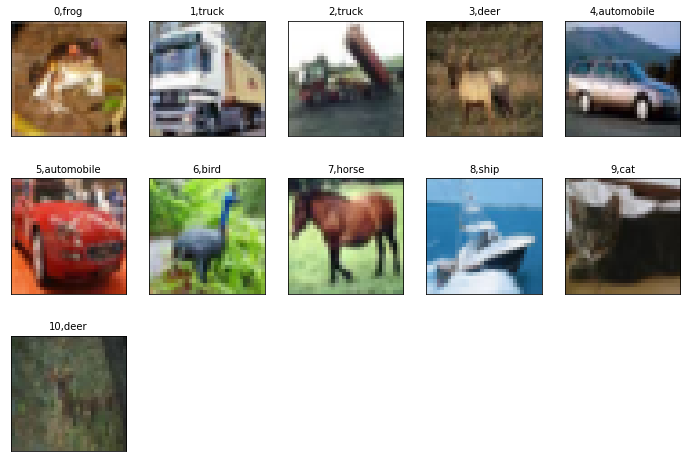

In [11]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [12]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# 影像正規化

In [13]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [14]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

# 轉換label 為OneHot Encoding

In [15]:
y_label_train.shape

(50000, 1)

In [16]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [18]:
y_label_train_OneHot.shape

(50000, 10)

In [19]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)